In [167]:
import matplotlib.pyplot as plt

In [168]:
import pandas as pd
new_data = pd.read_csv("new_case_data.csv")

In [187]:
new_data

,Unnamed: 0,cases,headnote,text,type,lower court judge,case status
0,1622,ann skiffington vs. liberty mutual insurance...,"motor vehicle, insurance. insurance, motor veh...","following a motor vehicle accident, the plaint...",civil,Constance M. Sweeney,affirm
1,1623,commonwealth vs. radhames gonzalez.,"corrected june 1, 2018controlled substances. ...","after a jury trial in superior court, the defe...",criminal,Thomas P. Billings,affirm
2,1624,commonwealth vs. stanley fredericq.,"further appellate review granted, 480 mass. 1...",as a result of information gathered in connect...,criminal,0.0,uncertain
3,1625,"cedar-fieldstone marketplace, lp vs. t.s. fi...","guaranty. contract, lease of real estate, rel...","in this case, we consider whether the release ...",civil,Renee P. Dupuis,affirm
4,1626,"citadel realty, llc vs. endeavor capital nor...","practice, civil, interlocutory appeal, motion ...",this appeal presents occasion to clarify the s...,civil,William F. Sullivan,reversed
...,...,...,...,...,...,...,...
288,1909,paul c. nordberg vs. commonwealth & others.,"department of youth services. statute, approp...","the plaintiff, paul c. nordberg, appeals from ...",civil,"Jane E. Mulqueen, J.",partially reversed
289,1910,"john doe, sex offender registry board no. 3687...",indecent assault and battery. minor. consent...,at issue in this appeal is the question whethe...,civil,"Jeffrey T. Karp, J.",affirm
290,1911,barry bloomstein vs. department of public sa...,license. state building code. administrative...,"after a hearing, a hearing officer of the boar...",civil,"Rosemary Connolly, J.",reversed
291,1912,commonwealth vs. james r. paul.,"firearms. license. evidence, firearm. pract...",the principal issue in this case is whether th...,criminal,"Lynn C. Rooney, J.",reversed


In [169]:
for i in range(len(new_data)):
    temp = new_data["case status"].iloc[i]
    if temp == "partially reverse" :
        new_data["case status"].iloc[i] = "partially reversed"
    elif temp == "reverse":
        new_data["case status"].iloc[i] = "reversed"
    elif temp == '0.0':
        new_data["case status"].iloc[i] = "uncertain"
    else:
        new_data["case status"].iloc[i] = new_data["case status"].iloc[i].lower()

new case only <br> <h2>2018/3 ~ 2019/11

In [170]:
new_civil_case = new_data[new_data["type"] == 'civil']
new_cr_case = new_data[new_data["type"] == 'criminal']

In [171]:
new_civil_case_num = len(new_civil_case)
new_cr_case_num = len(new_cr_case)
new_total_case = len(new_data)

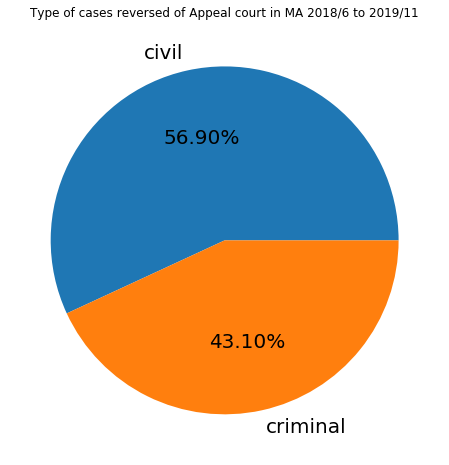

In [172]:
new_data_chart = new_data.groupby('type').size()
new_data_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Type of cases reversed of Appeal court in MA 2018/6 to 2019/11")
plt.ylabel("")
plt.show()

In [173]:
for i in range(len(new_data)):
    temp = new_data["case status"].iloc[i]
    new_data["case status"].iloc[i] = temp.lower()

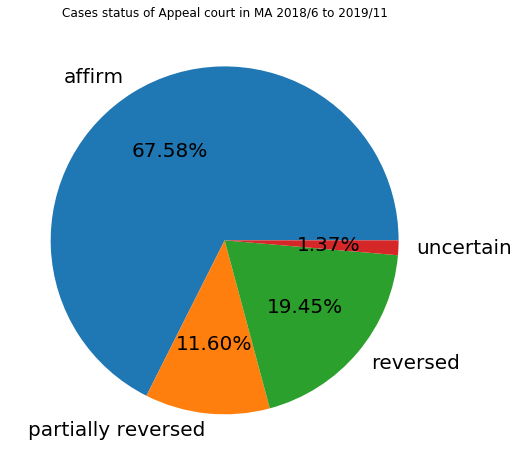

In [174]:
new_data_chart2 = new_data.groupby("case status").size()
new_data_chart2.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Cases status of Appeal court in MA 2018/6 to 2019/11")
plt.ylabel("")
plt.show()

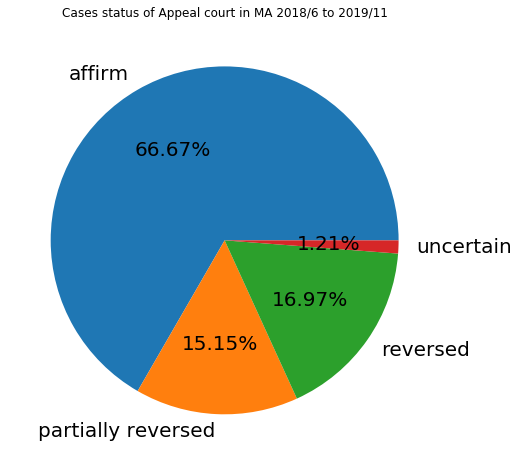

In [175]:
new_civil_chart2 = new_civil_case.groupby("case status").size()
new_civil_chart2.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Cases status of Appeal court in MA 2018/6 to 2019/11")
plt.ylabel("")
plt.show()

<h3>all civil cases that public in MA

In [176]:
data = pd.read_csv("../cases.csv")

In [177]:
old_appeal_case = data[data['Court Type'] == "APPEALS COURT"][['Case Name', 'Case Type', 'Has Affirm', 'Has Reverse', 'Court Type']]

In [178]:
old_appeal_case["Has Affirm"]= old_appeal_case["Has Affirm"].astype(str)
old_appeal_case["Has Reverse"]= old_appeal_case["Has Reverse"].astype(str)

def define_reverse(df):
    appealed = []
    for i, row in df.iterrows():
        if (row['Has Reverse']  ==   'Yes' ) :
            appealed.append('reversed')
        elif (row['Has Affirm']  ==   'Yes')  :
            appealed.append('affirm')
        else:
            appealed.append('partially reversed')
    return appealed

old_appeal_case['reverse'] = define_reverse(old_appeal_case)
old_appeal_case = old_appeal_case.drop(['Has Reverse', 'Has Affirm', 'Court Type'], axis = 1)


In [183]:
new_appeal_case = new_civil_case[["cases","type","case status"]]

In [184]:
new_appeal_case = new_appeal_case.rename(columns={"cases": "Case Name", "type": "Case Type","case status" : "reverse"})

In [185]:
all_civil_case = pd.concat([old_appeal_case,new_appeal_case],axis= 0)

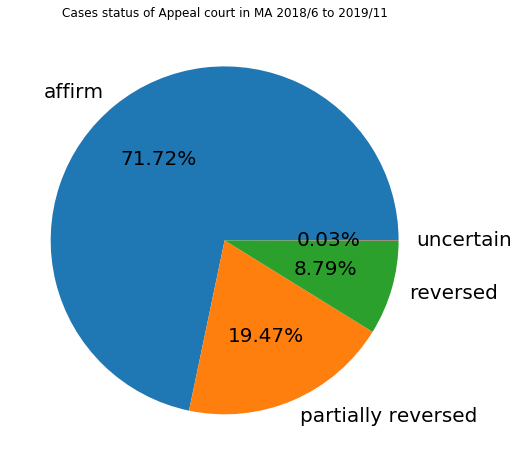

In [186]:
civil_chart = all_civil_case.groupby("reverse").size()
civil_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Civil Cases status of Appeal court in MA 2018/6 to 2019/11")
plt.ylabel("")
plt.show()